[texto del vínculo](https://)

### Redes neuronales para clasificación de la función XOR

---

En el problema de XOR (eXclusive OR) buscamos predecir el output de las puertas lógicos que induce XOR; es decir, lo equivalente a la función de desigualdad: La salida es verdadera si las entradas son distintas. Falso de lo contrario. Podemos la función ver en forma de tabla como:

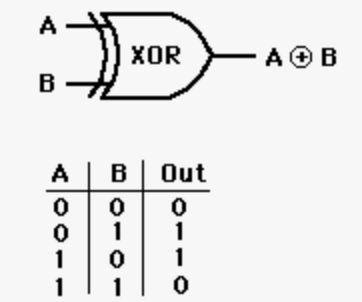


Este problema puede ser visto como un problema de clasificación en el cual se puede aprovechar un modelo de aprendizaje supervisado. Si este problema se aborda desde una perspectiva lineal (es decir, no se aplican funciones de activación no lineales, entonces el problema se vuelve particularmente complicado ya que el problema XOR no es linealmente separable. Ver el anexo)


Como solución se plantea el uno de una Multi Layer Perceptron (MLP) considerando dos casos:

- Red con una capa oculta
- Red con dos capas ocultas


#### 1) Módulos utilizados

In [ ]:
##### importando modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#### 2) Creación de base de datos sintética 

In [ ]:
#creando nuestros arreglos de información
X = np.array( #arreglo de X
    [
        [1, 1],
        [1, 0],
        [0, 1],
        [0, 0]])
Y = np.array( #vector de Y
    [
        [0],
        [1],
        [1],
        [0]])
 
# Especificando los espacios de memoria para sesión de tensor flow
x = tf.placeholder(tf.float32, shape=[4,2])#
y = tf.placeholder(tf.float32, shape=[4,1])

### Red con una capa oculta
-------



#### 3) Declaración inicial de modelo

In [ ]:
 
# matriz de W(pesos)
W1 = tf.Variable([[1.0, 0.0], [1.0, 0.0]], shape=[2,2])
W2 = tf.Variable([[0.0], [1.0]], shape=[2,1])
 
# sesgo(inicializacion)
B1 = tf.Variable([0.0, 0.0], shape=[2])
B2 = tf.Variable([0.0], shape=1)
 
#capa oculta y capa de salida
output =tf.sigmoid(tf.matmul(tf.sigmoid(tf.matmul(x, W1) + B1), W2) + B2)
 
# estimacion del error
e = tf.reduce_mean(tf.squared_difference(y, output)) #diferencia cuadrada
train = tf.train.GradientDescentOptimizer(0.1).minimize(e) #descenso por gradiente 
 

#### 4) Ejecución del modelo y epocs

In [ ]:
init = tf.global_variables_initializer()
sesion = tf.Session()
sesion.run(init)
 
for i in range (100001):#numero de epocas
    error = sesion.run(train, feed_dict={x: X, y: Y})
    if i % 10000 == 0:
        print('\nEpoca: ' + str(i))
        print('\nError: ' + str(sesion.run(e, feed_dict={x: X, y: Y})))
        for el in sesion.run(output, feed_dict={x: X, y: Y}):
            print('    ',el)
sesion.close()
 
print ("Entrenamiento listo bro")



Epoca: 0

Error: 0.26442587
     [0.6198486]
     [0.6200183]
     [0.6200183]
     [0.62025726]

Epoca: 10000

Error: 0.0700234
     [0.33965564]
     [0.7534745]
     [0.7534745]
     [0.20779318]

Epoca: 20000

Error: 0.006195537
     [0.08856922]
     [0.9271755]
     [0.9271755]
     [0.07956651]

Epoca: 30000

Error: 0.0028774934
     [0.05970755]
     [0.9504955]
     [0.9504955]
     [0.05516872]

Epoca: 40000

Error: 0.0018379437
     [0.04751286]
     [0.9604853]
     [0.9604853]
     [0.04440132]

Epoca: 50000

Error: 0.0013404149
     [0.04047897]
     [0.96628344]
     [0.96628344]
     [0.03807229]

Epoca: 60000

Error: 0.0010511391
     [0.03579015]
     [0.97015905]
     [0.97015905]
     [0.03380322]

Epoca: 70000

Error: 0.0008627281
     [0.03238276]
     [0.97297317]
     [0.97297317]
     [0.03068176]

Epoca: 80000

Error: 0.0007307594
     [0.02977225]
     [0.97513145]
     [0.97513145]
     [0.02828005]

Epoca: 90000

Error: 0.0006333374
     [0.02769697]
     

### Red con dos capa oculta
-------


#### 5) Declaración inicial de modelo

In [ ]:
 
# matriz de W(pesos)
W1 = tf.Variable([[1.0, 0.0], [1.0, 0.0]], shape=[2,2])
W2 = tf.Variable([[1.0, 0.0], [1.0, 0.0]], shape=[2,2])
W3 = tf.Variable([[0.0], [1.0]], shape=[2,1])
 
# sesgo(inicializacion)
B1 = tf.Variable([0.0, 0.0], shape=[2])
B2 = tf.Variable([0.0, 0.0], shape=[2])
B3 = tf.Variable([0.0], shape=1)
 
#capa oculta y capa de salida
output =tf.sigmoid(tf.matmul(tf.sigmoid(tf.matmul(tf.sigmoid(tf.matmul(x, W1) + B1), W2) + B2), W3) + B3)
 
# estimacion del error
e = tf.reduce_mean(tf.squared_difference(y, output)) #diferencia cuadrada
train = tf.train.GradientDescentOptimizer(0.1).minimize(e) #descenso por gradiente 

#### 6) Declaración inicial de modelo

In [ ]:
init = tf.global_variables_initializer()
sesion = tf.Session()
sesion.run(init)
 
for i in range (100001):#numero de epocas
    error = sesion.run(train, feed_dict={x: X, y: Y})
    if i % 10000 == 0:
        print('\nEpoca: ' + str(i))
        print('\nError: ' + str(sesion.run(e, feed_dict={x: X, y: Y})))
        for el in sesion.run(output, feed_dict={x: X, y: Y}):
            print('    ',el)
sesion.close()
 
print ("Entrenamiento listo bro")


Epoca: 0

Error: 0.26436722
     [0.6198008]
     [0.61983436]
     [0.61983436]
     [0.61989033]

Epoca: 10000

Error: 0.238005
     [0.53894]
     [0.52116394]
     [0.52116394]
     [0.45055047]

Epoca: 20000

Error: 0.0062599406
     [0.09620571]
     [0.9259507]
     [0.9259507]
     [0.06940913]

Epoca: 30000

Error: 0.0011713151
     [0.04013261]
     [0.9683399]
     [0.9683399]
     [0.03270951]

Epoca: 40000

Error: 0.0006243718
     [0.02904817]
     [0.97697055]
     [0.97697055]
     [0.02435118]

Epoca: 50000

Error: 0.00042243328
     [0.02379024]
     [0.98109794]
     [0.98109794]
     [0.02022824]

Epoca: 60000

Error: 0.00031825076
     [0.02059409]
     [0.98361886]
     [0.98361886]
     [0.01766926]

Epoca: 70000

Error: 0.0002549142
     [0.01839396]
     [0.9853544]
     [0.9853544]
     [0.015885]

Epoca: 80000

Error: 0.00021243934
     [0.01676407]
     [0.98663986]
     [0.98663986]
     [0.01455116]

Epoca: 90000

Error: 0.00018198144
     [0.01550844]
  

### Anexo

Cuando se intenta resolver el problema de XOR con funciones lineales (ya sea una capa o dos), no se puede resolver:

In [ ]:
# matriz de W(pesos)
W1 = tf.Variable([[1.0, 0.0], [1.0, 0.0]], shape=[2,2])
W2 = tf.Variable([[0.0], [1.0]], shape=[2,1])
 
# sesgo(inicializacion)
B1 = tf.Variable([0.0, 0.0], shape=[2])
B2 = tf.Variable([0.0], shape=1)
 
#capa oculta y capa de salida
output = tf.matmul(tf.matmul(x, W1) + B1, W2) + B2
 
# estimacion del error
e = tf.reduce_mean(tf.squared_difference(y, output)) #diferencia cuadrada
train = tf.train.GradientDescentOptimizer(0.1).minimize(e) #descenso por gradiente 
 

In [ ]:
init = tf.global_variables_initializer()
sesion = tf.Session()
sesion.run(init)
 
for i in range (100001):#numero de epocas
    error = sesion.run(train, feed_dict={x: X, y: Y})
    if i % 10000 == 0:
        print('\nEpoca:  ' + str(i))
        print('\nError: ' + str(sesion.run(e, feed_dict={x: X, y: Y})))
        for el in sesion.run(output, feed_dict={x: X, y: Y}):
            print('    ',el)
sesion.close()
 
print ("Entrenamiento listo bro")


Epoca: 0

Error: 0.28374997
     [0.5]
     [0.35]
     [0.35]
     [0.2]

Epoca: 10000

Error: 0.25
     [0.5]
     [0.5]
     [0.5]
     [0.49999997]

Epoca: 20000

Error: 0.25
     [0.5]
     [0.5]
     [0.5]
     [0.5]

Epoca: 30000

Error: 0.25
     [0.5]
     [0.5]
     [0.5]
     [0.5]

Epoca: 40000

Error: 0.25
     [0.5]
     [0.5]
     [0.5]
     [0.5]

Epoca: 50000

Error: 0.25
     [0.5]
     [0.5]
     [0.5]
     [0.5]

Epoca: 60000

Error: 0.25
     [0.5]
     [0.5]
     [0.5]
     [0.5]

Epoca: 70000

Error: 0.25
     [0.5]
     [0.5]
     [0.5]
     [0.5]

Epoca: 80000

Error: 0.25
     [0.5]
     [0.5]
     [0.5]
     [0.5]

Epoca: 90000

Error: 0.25
     [0.5]
     [0.5]
     [0.5]
     [0.5]

Epoca: 100000

Error: 0.25
     [0.5]
     [0.5]
     [0.5]
     [0.5]
Entrenamiento listo bro
